In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

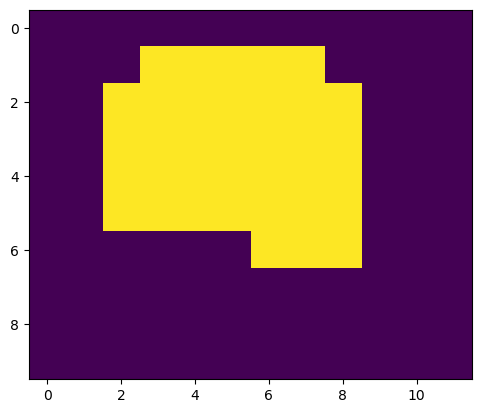

In [2]:
kernel = np.ones((3, 3), np.uint8)
img = np.zeros((10, 12), np.uint8)
img[1, 3:8] = img[2:6, 2:9] = img[6, 6:9] = 1
plt.imshow(img)

In [10]:
def erode(img, kernel):
    rows, cols = img.shape
    krows, kcols = kernel.shape
    print(krows, kcols)
    pad_rows = krows // 2
    pad_cols = kcols // 2
    
    padded_img = cv.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv.BORDER_CONSTANT)
    
    output = np.zeros_like(img)
    
    for i in range (rows):
        for j in range (cols):
            
            roi = padded_img[i:i + krows, j:j + kcols]
            
            result = np.zeros_like(roi)
            h, w = result.shape

            for x in range (h):
                for y in range (w):
                    result[x, y] = roi[x, y] & kernel[x, y]
            
            if np.all(result):
                output[i][j] = 1
    
    return output

3 3


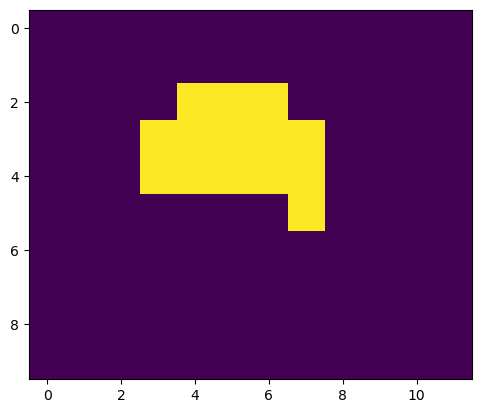

In [11]:
output = erode(img, kernel)
plt.imshow(output)

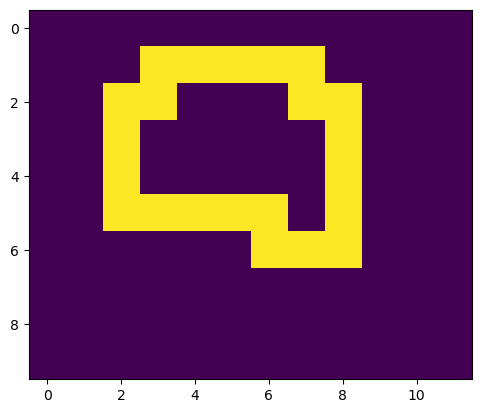

In [12]:
result = img - output
plt.imshow(result)